# K-Nearest Neighbour

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import Cleaner as cl

dataset = cl.get_and_clean_df('../data/bilhandel_unclean.csv')
display(dataset)

,Make,Brændstoftype,Gearkasse,Model,Kilometer,Årgang,Hestekræfter,Antal døre,Antal gear,Km/l,0 - 100 km/t,Tophastighed,Vægt,Grøn Ejerafgift,Nypris,Pris
3,Suzuki,Benzin,Manuel,Swift,157000,2009,102,5,5,16.4,10.0,185.0,975.000,2.52,169990.0,29900
4,Opel,Benzin,Manuel,Insignia,129000,2012,140,5,6,12.8,12.2,202.0,1.538,4.36,346175.0,89900
6,Citroën,Diesel,Manuel,C4,158000,2016,100,5,5,32.3,10.7,184.0,1.070,260.00,199990.0,99900
7,Chevrolet,Diesel,Manuel,Cruze,70000,2012,163,5,6,17.9,8.5,205.0,1.480,5.54,244995.0,69900
9,Mercedes,Diesel,Manuel,C200,185000,2015,136,5,6,23.3,10.1,214.0,1.545,3.02,568502.0,169700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,Toyota,Diesel,Manuel,Verso,81000,2015,112,5,6,22.2,12.7,185.0,1.635,3.88,336363.0,149900
19993,Audi,Diesel,Automatisk,A6,65000,2018,190,5,7,22.7,8.5,226.0,1.800,3.02,621198.0,364900
19995,Hyundai,El,Automatisk,Ioniq,6000,2020,120,5,1,80.0,9.9,165.0,1.475,660.00,275914.0,264700
19996,Mini,Benzin,Automatisk,Cooper,70000,2016,192,5,6,18.5,6.8,230.0,1.240,1.28,378320.0,2300


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing

X = dataset.loc[:, ['Make','Gearkasse','Model','Kilometer','Årgang','Hestekræfter','Antal døre','Antal gear', 'Km/l', '0 - 100 km/t','Tophastighed','Vægt','Grøn Ejerafgift','Nypris','Pris']].values
y = dataset.loc[:, ['Brændstoftype']].values

le = preprocessing.LabelEncoder()
X[:, 0] = le.fit_transform(X[:,0])
X[:, 1] = le.fit_transform(X[:,1])
X[:, 2] = le.fit_transform(X[:,2])
X[:, 3] = le.fit_transform(X[:,3])

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [61]:
scaled_features = scaler.transform(X)
dataset_features = pd.DataFrame(scaled_features,columns=['Make','Gearkasse','Model','Kilometer','Årgang','Hestekræfter','Antal døre','Antal gear', 'Km/l', '0 - 100 km/t','Tophastighed','Vægt','Grøn Ejerafgift','Nypris','Pris'])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
pred = knn.predict(X_test)
display(pred)

from sklearn.metrics import classification_report,confusion_matrix
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

array(['Benzin', 'Diesel', 'Diesel', ..., 'Diesel', 'Benzin', 'Diesel'],
      dtype=object)

WITH K=1


[[1853  111    0]
 [  98 1441    0]
 [   1    0   99]]


              precision    recall  f1-score   support

      Benzin       0.95      0.94      0.95      1964
      Diesel       0.93      0.94      0.93      1539
          El       1.00      0.99      0.99       100

    accuracy                           0.94      3603
   macro avg       0.96      0.96      0.96      3603
weighted avg       0.94      0.94      0.94      3603



# Choosing a K Value

In [65]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

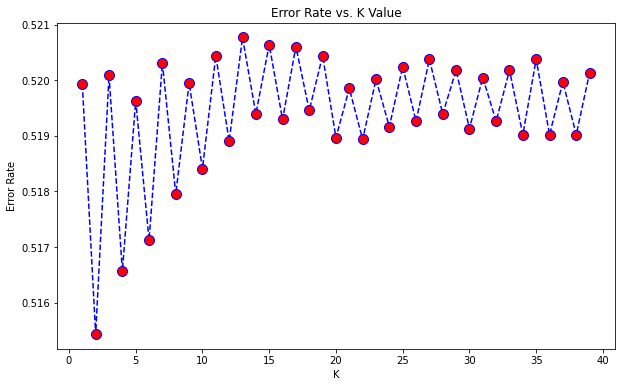

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [74]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[1804  159    1]
 [ 184 1355    0]
 [   0    0  100]]


              precision    recall  f1-score   support

      Benzin       0.91      0.92      0.91      1964
      Diesel       0.89      0.88      0.89      1539
          El       0.99      1.00      1.00       100

    accuracy                           0.90      3603
   macro avg       0.93      0.93      0.93      3603
weighted avg       0.90      0.90      0.90      3603

